# CSE 6367 Programming Assignment 1 (P1)
## Fall 2023
## Due: 11:59pm Central Time, Friday, September 22, 2023

### Task 1 (20 points) 

Import the "colors.png" image 

<img src = "Images/colors.png" style="width:200px;height:200px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot. 

b) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

d) Convert the original RGB image to the HSV color space.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
# Read the image.
colors = cv2.imread("./Images/colors.png")

### a) Display Red, Green and Blue color channels separately in a 1X3 plot

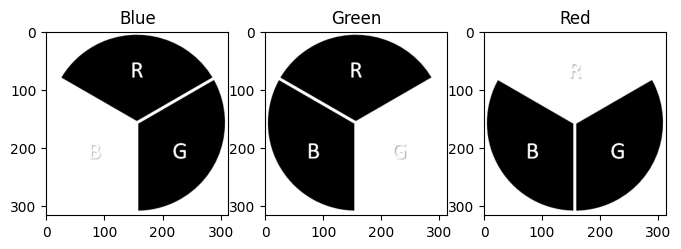

In [12]:
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
blue = colors[:,:,0]
plt.title("Blue")
plt.imshow(blue, cmap="gray")

plt.subplot(1,3,2)
green = colors[:,:,1]
plt.title("Green")
plt.imshow(green, cmap="gray")

plt.subplot(1,3,3)
red = colors[:,:,2]
plt.title("Red")
plt.imshow(red, cmap="gray")

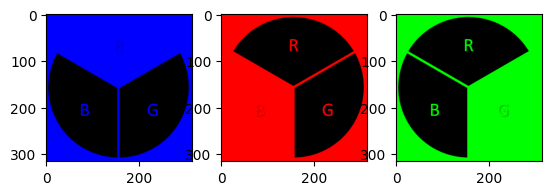

In [17]:
# Alternate method to show different channels - this one will handle the cmap issue with matplotlib.
plt.subplot(1,3,1)
temp_r = colors.copy()
temp_r[:,:,0] = 0
temp_r[:,:,1] = 0
plt.imshow(temp_r)

plt.subplot(1,3,2)
temp_b = colors.copy()
temp_b[:,:,1] = 0
temp_b[:,:,2] = 0
plt.imshow(temp_b)

plt.subplot(1,3,3)
temp_g = colors.copy()
temp_g[:,:,0] = 0
temp_g[:,:,2] = 0
plt.imshow(temp_g)

### b) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

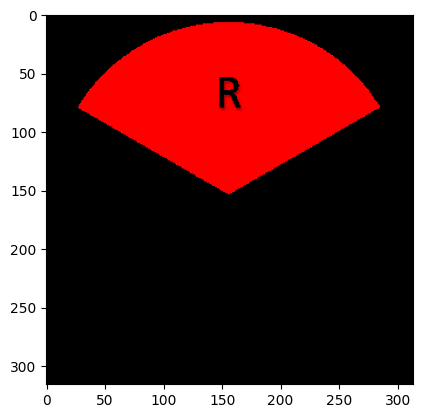

In [19]:
masked_image = colors.copy()
low = np.array([0,0,100])
high = np.array([50,50,255])

mask = cv2.inRange(masked_image, low, high)

masked_image = cv2.bitwise_and(masked_image, masked_image, mask=mask)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

plt.imshow(masked_image)

### c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

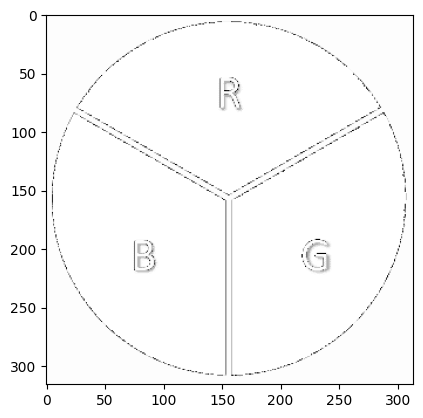

In [21]:
grayscale = colors.copy()
grayscale = (grayscale[:,:,0] + grayscale[:,:,1] + grayscale[:,:,2])/3

plt.imshow(grayscale, cmap="gray")

### d) Convert the original RGB image to the HSV color space.

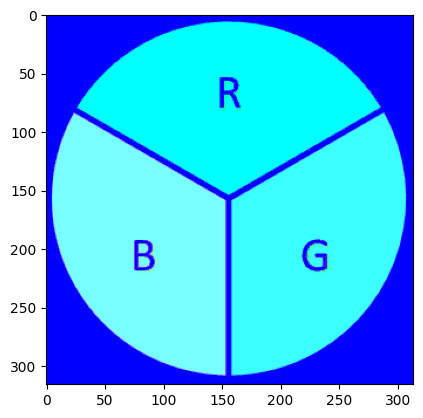

In [26]:
hsv = colors.copy()
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)

plt.imshow(hsv)

### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

b) Rotate the image counter-clockwise by 60 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

In [27]:
cameraman = cv2.imread("./Images/cameraman.jpeg")

### a) Shift the original image 50 pixels left and 50 pixels down and display the translated image.

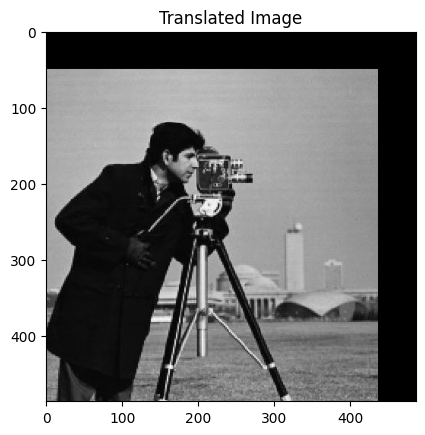

In [36]:
translate = cameraman.copy()
tx = -50
ty = 50

translate_matrix = np.array([[1,0,tx],
                  [0,1,ty]], dtype=np.float32)

translate = cv2.warpAffine(src=translate, M=translate_matrix, dsize=(translate.shape[0], translate.shape[1]))
plt.title("Translated Image")
plt.imshow(translate[:,:,::-1])

### b) Rotate the image counter-clockwise by 60 degree and display the result.

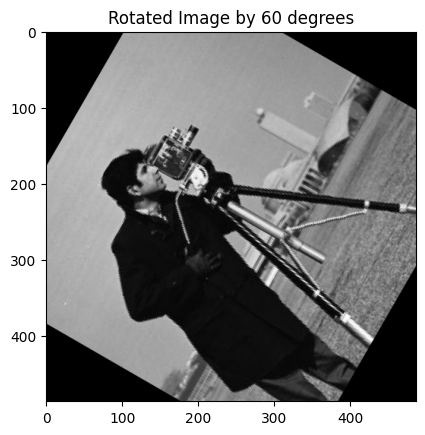

In [57]:
rotate = cameraman.copy()
rotate_matrix = cv2.getRotationMatrix2D((rotate.shape[0]/2, rotate.shape[1]/2), 60, 1)

rotate = cv2.warpAffine(src=rotate, M = rotate_matrix, dsize=(rotate.shape[0], rotate.shape[1]))
plt.title("Rotated Image by 60 degrees")
plt.imshow(rotate)

### c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

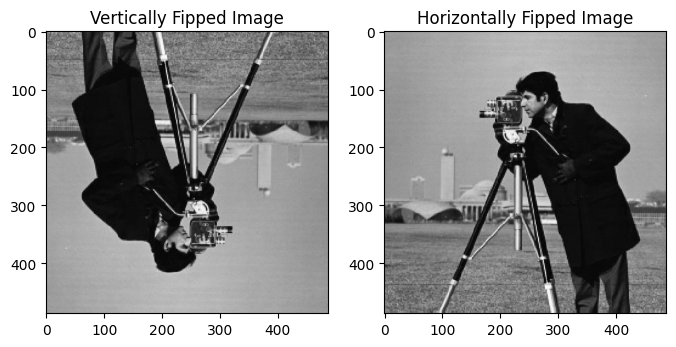

In [58]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
vertical = cameraman.copy()
vertical = cv2.flip(vertical, 0)
plt.title("Vertically Fipped Image")
plt.imshow(vertical)

plt.subplot(1,2,2)
horizontal = cameraman.copy()
horizontal = cv2.flip(horizontal, 1)
plt.title("Horizontally Fipped Image")
plt.imshow(horizontal)

### d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

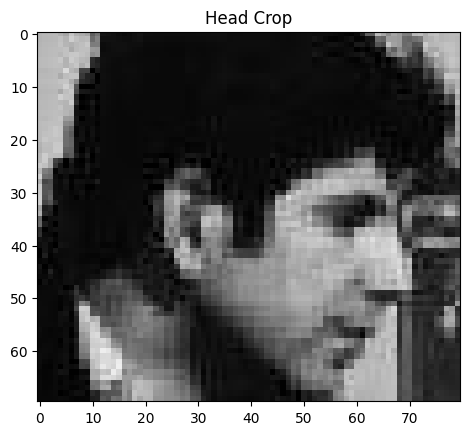

In [65]:
crop = cameraman.copy()
crop = crop[80:150,180:260,:]
plt.title("Head Crop")
plt.imshow(crop)

### Task 3 (20 points) 

Import the "cameraman.jpeg" image and

a) Perform average blur with kernel size 9X9 and 25X25. 

b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

c) Perform median blur with kernel size 5X5 and 15X15.

d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered/processed images in a 1X3 grid. 

In [66]:
cameraman = cv2.imread("./Images/cameraman.jpeg")

### a) Perform average blur with kernel size 9X9 and 25X25.

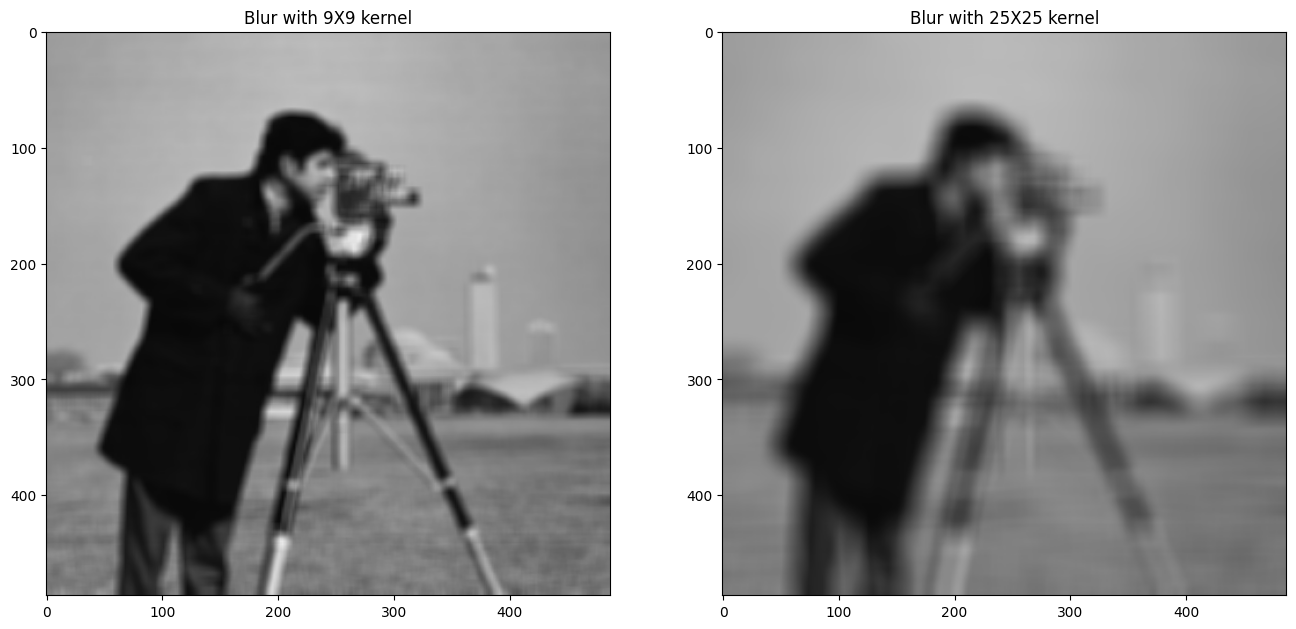

In [72]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
blur_9 = cameraman.copy()
blur_9 = cv2.blur(blur_9, (9,9))
plt.title("Blur with 9X9 kernel")
plt.imshow(blur_9)

plt.subplot(1,2,2)
blur_25 = cameraman.copy()
blur_25 = cv2.blur(blur_25, (25,25))
plt.title("Blur with 25X25 kernel")
plt.imshow(blur_25)

### b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15.0

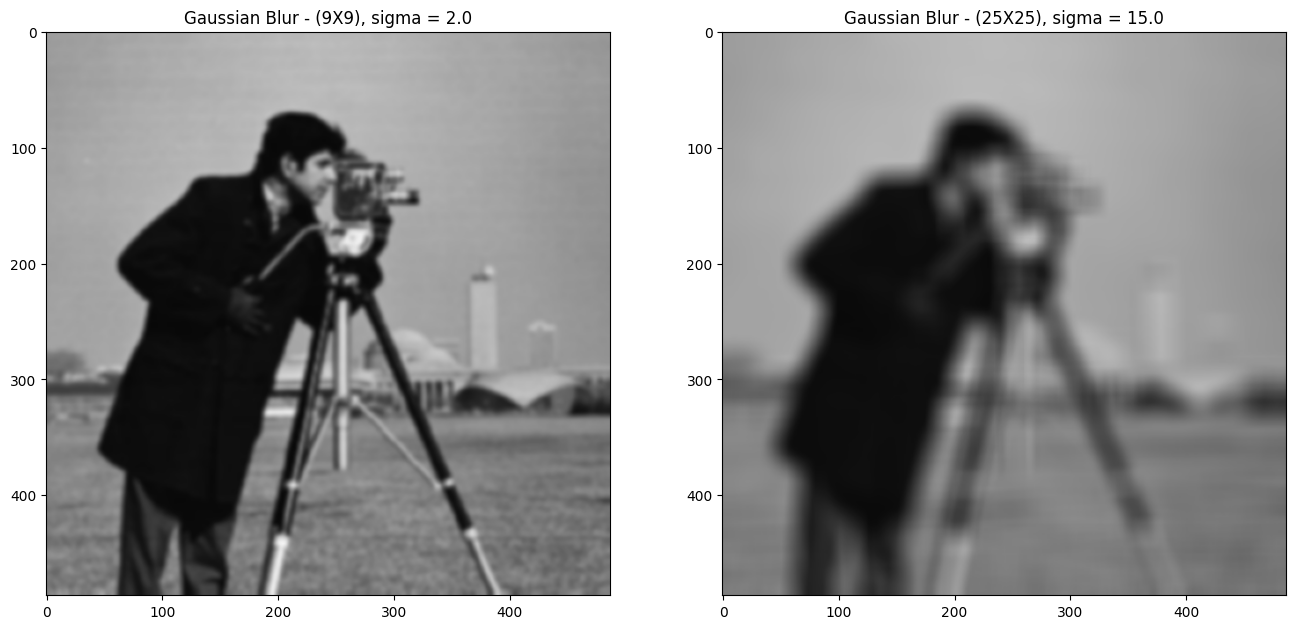

In [75]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
gaussian_9 = cameraman.copy()
gaussian_9 = cv2.GaussianBlur(gaussian_9, (9,9), 2.0)
plt.title("Gaussian Blur - (9X9), sigma = 2.0")
plt.imshow(gaussian_9)

plt.subplot(1,2,2)
gaussian_25 = cameraman.copy()
gaussian_25 = cv2.GaussianBlur(gaussian_25, (25,25), 15.0)
plt.title("Gaussian Blur - (25X25), sigma = 15.0")
plt.imshow(gaussian_25)


### c) Perform median blur with kernel size 5X5 and 15X15.

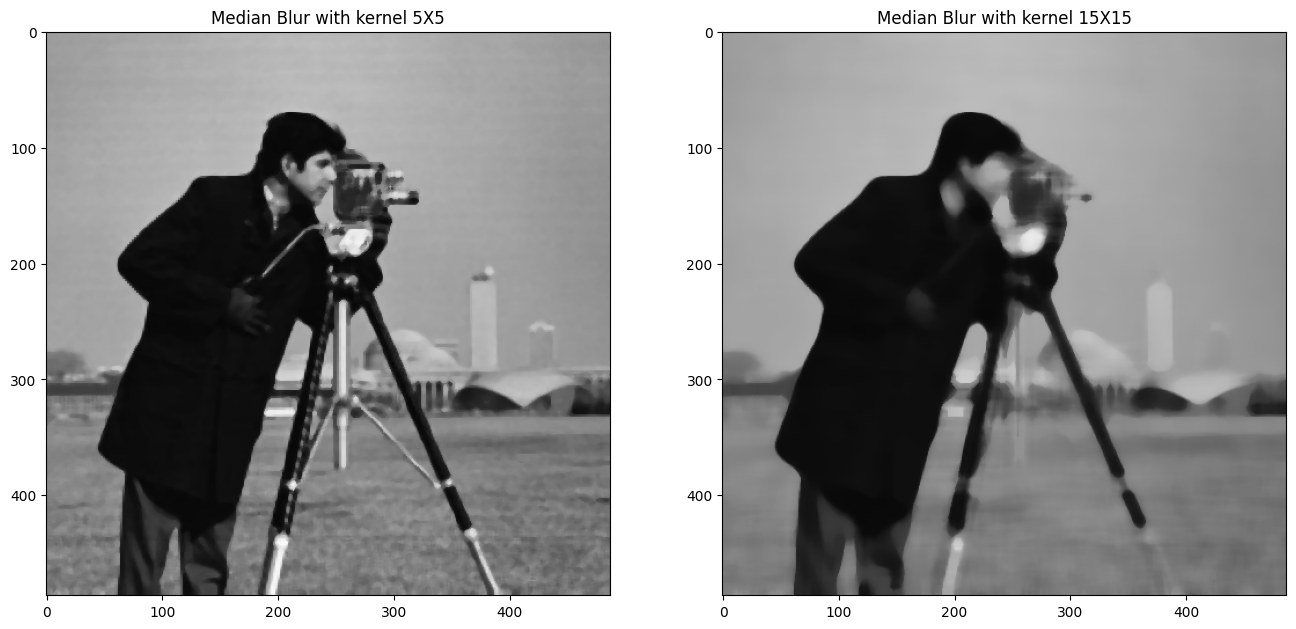

In [77]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
median_5 = cameraman.copy()
median_5 = cv2.medianBlur(median_5, 5)
plt.title("Median Blur with kernel 5X5")
plt.imshow(median_5)

plt.subplot(1,2,2)
median_15 = cameraman.copy()
median_15 = cv2.medianBlur(median_15, 15)
plt.title("Median Blur with kernel 15X15")
plt.imshow(median_15)

### d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels.

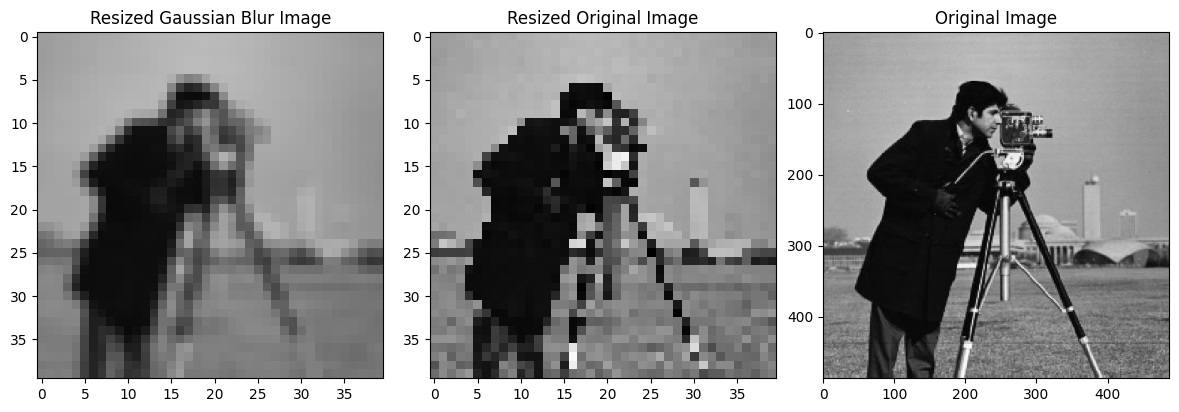

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
gaussian_25 = cameraman.copy()
gaussian_25 = cv2.GaussianBlur(gaussian_25, (25,25), 15.0)

gaussian_25_resize = cv2.resize(gaussian_25, (40,40), interpolation=cv2.INTER_LINEAR)
plt.title("Resized Gaussian Blur Image")
plt.imshow(gaussian_25_resize)

plt.subplot(1,3,2)
resize_original = cameraman.copy()
resize_original = cv2.resize(resize_original, (40,40), interpolation=cv2.INTER_LINEAR)
plt.title("Resized Original Image")
plt.imshow(resize_original)

plt.subplot(1,3,3)
plt.title("Original Image")
plt.imshow(cameraman)

### Task 4 (20 points)

Import the "cameraman.jpeg" image and apply

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector 

d) Edge detection using difference of Gaussians (DoG)
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot. 

In [85]:
cameraman = cv2.imread("./Images/cameraman.jpeg")

### a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

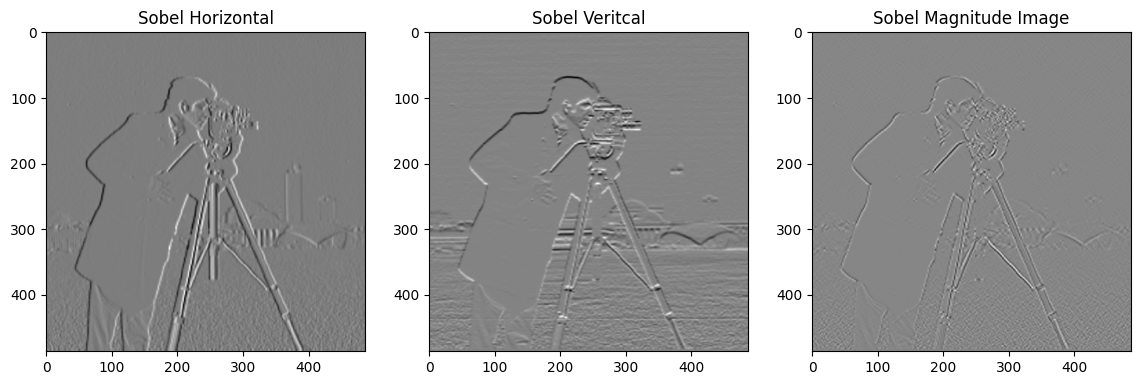

In [90]:
sobel = cameraman.copy()
# Convert image to grayscale
sobel = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(src=sobel, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=sobel, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=sobel, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.title("Sobel Horizontal")
plt.imshow(sobelx, cmap="gray")

plt.subplot(1,3,2)
plt.title("Sobel Veritcal")
plt.imshow(sobely, cmap="gray")

plt.subplot(1,3,3)
plt.title("Sobel Magnitude Image")
plt.imshow(sobelxy, cmap="gray")

### b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

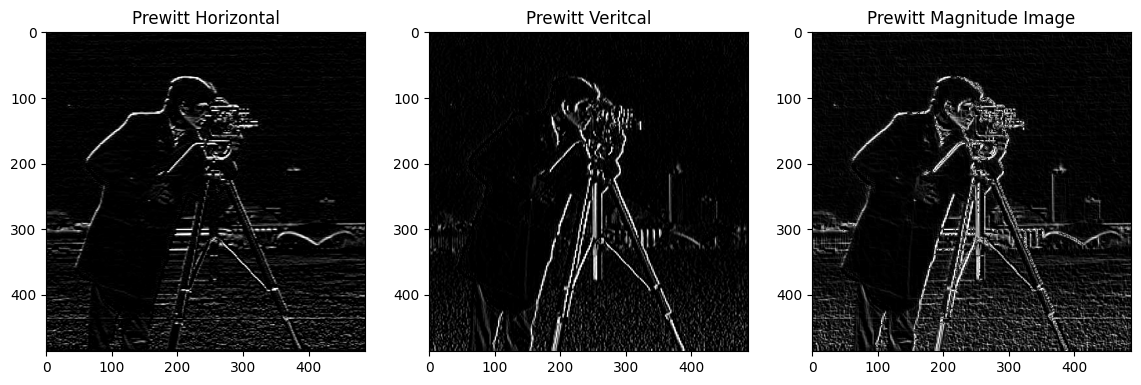

In [96]:
prewitt = cameraman.copy()
prewitt = cv2.cvtColor(prewitt, cv2.COLOR_BGR2GRAY)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(prewitt, -1, kernelx)
prewitt_y = cv2.filter2D(prewitt, -1, kernely)

prewitt_xy = prewitt_x + prewitt_y

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.title("Prewitt Horizontal")
plt.imshow(prewitt_x, cmap="gray")

plt.subplot(1,3,2)
plt.title("Prewitt Veritcal")
plt.imshow(prewitt_y, cmap="gray")

plt.subplot(1,3,3)
plt.title("Prewitt Magnitude Image")
plt.imshow(prewitt_xy, cmap="gray")


### c) Laplacian edge detector

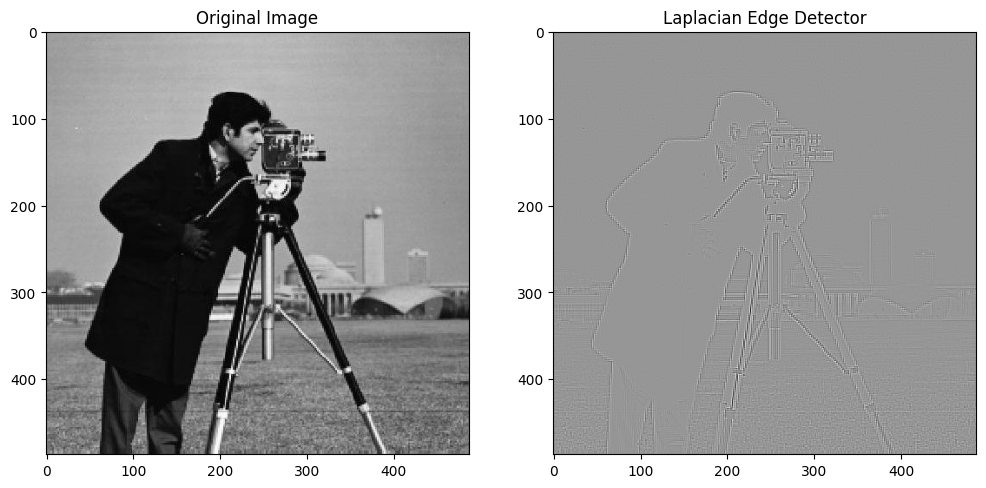

In [99]:
laplacian = cameraman.copy()
laplacian = cv2.cvtColor(laplacian, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(laplacian, ddepth=cv2.CV_16S, ksize=3)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cameraman, cmap="gray")

plt.subplot(1,2,2)
plt.title("Laplacian Edge Detector")
plt.imshow(laplacian, cmap="gray")

### d) Edge detection using difference of Gaussians (DoG)

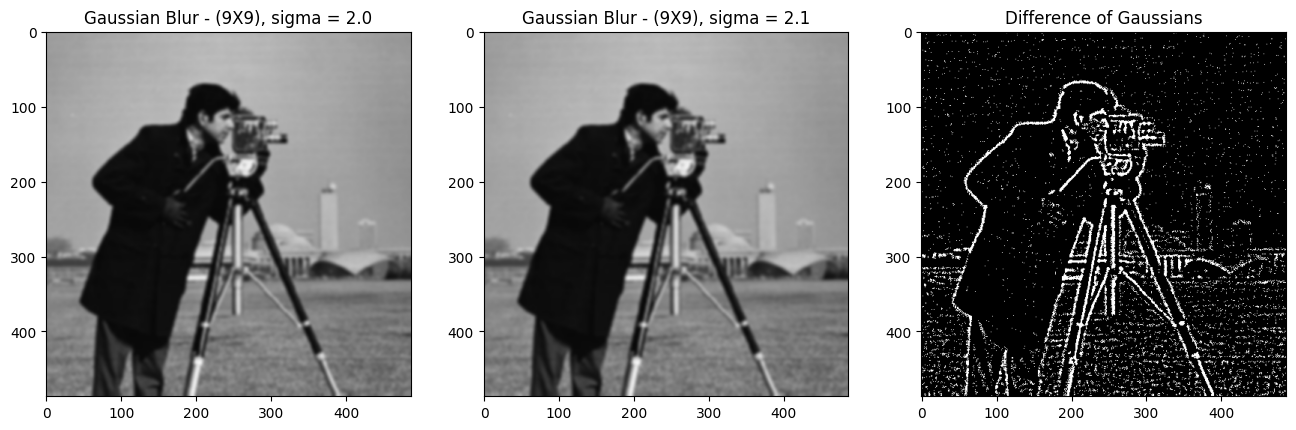

In [110]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
gaussian_9 = cameraman.copy()
gaussian_9 = cv2.GaussianBlur(gaussian_9, (9,9), 2.0)
plt.title("Gaussian Blur - (9X9), sigma = 2.0")
plt.imshow(gaussian_9)

plt.subplot(1,3,2)
gaussian_9_new = cameraman.copy()
gaussian_9_new = cv2.GaussianBlur(gaussian_9_new, (9,9), 2.1) # Sigma changed 
plt.title("Gaussian Blur - (9X9), sigma = 2.1")
plt.imshow(gaussian_9_new)

plt.subplot(1,3,3)
DoG = gaussian_9_new - gaussian_9
plt.title("Difference of Gaussians")
plt.imshow(DoG, cmap="gray")

### Task 5 (20 points)

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below: 

    - Smooth the image to remove the noise (Gaussian filter)
    - Find the gradients of the image
    - Apply non-maximum suppression
    - Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

Implement "Canny Edge Detector" from scratch using the steps above (for each step above, you can use library functions) and compare your result with OpenCV implementation of "Canny Edge Detector" (https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
